In [14]:
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import classification_report
import numpy as np
from sklearn.model_selection import learning_curve
from sklearn.model_selection import train_test_split
import time

# Load the data into a pandas DataFrame (assuming you have a CSV file)
data = pd.read_csv('preprocessed_data_bbc.csv')

# Extract the cleaned text and corresponding labels
X = data['Text'].values
y = data['Category'].values

# Split the data into training, validation, and testing sets
X_trainval, X_test, y_trainval, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train, X_val, y_train, y_val = train_test_split(X_trainval, y_trainval, test_size=0.2, random_state=42)

# Convert the text data into numerical features using TF-IDF
vectorizer = TfidfVectorizer(min_df=0.002, max_df=0.95, norm='l2', ngram_range=(1, 2), stop_words='english', sublinear_tf=True)
X_train = vectorizer.fit_transform(X_train)
X_val = vectorizer.transform(X_val)
X_test = vectorizer.transform(X_test)

# Build Gaussian Naive Bayes model
classifier_gnb = GaussianNB(var_smoothing=1e-9)

# Start the timer
start_time = time.time()

# Train the model
classifier_gnb.fit(X_train.toarray(), y_train)

# Stop the timer and calculate the training time
training_time = time.time() - start_time

# Predict the labels for the validation data
y_val_pred = classifier_gnb.predict(X_val.toarray())

# Generate the classification report for validation
report_val = classification_report(y_val, y_val_pred)

# Print the classification report for validation
print("Validation Classification Report:")
print(report_val)

# Predict the labels for the testing data
y_test_pred = classifier_gnb.predict(X_test.toarray())

# Generate the classification report for testing
report_test = classification_report(y_test, y_test_pred)

# Print the classification report for testing
print("Testing Classification Report:")
print(report_test)

# Print the training time
print("Training Time: {:.2f} seconds".format(training_time))


Validation Classification Report:
               precision    recall  f1-score   support

     business       1.00      0.91      0.95        54
entertainment       1.00      0.96      0.98        45
     politics       0.92      1.00      0.96        44
        sport       0.98      1.00      0.99        60
         tech       0.95      1.00      0.97        36

     accuracy                           0.97       239
    macro avg       0.97      0.97      0.97       239
 weighted avg       0.97      0.97      0.97       239

Testing Classification Report:
               precision    recall  f1-score   support

     business       0.96      0.97      0.97        75
entertainment       1.00      0.98      0.99        46
     politics       0.95      0.98      0.96        56
        sport       1.00      1.00      1.00        63
         tech       0.96      0.93      0.95        58

     accuracy                           0.97       298
    macro avg       0.97      0.97      0.97      

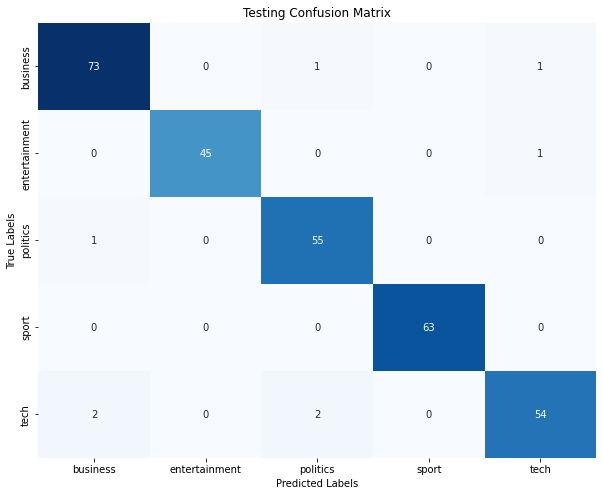

In [16]:
# Generate the confusion matrix for testing
cm = confusion_matrix(y_test, y_test_pred)

# Get the unique category labels
categories = np.unique(y)

# Plot the confusion matrix for testing
plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", cbar=False, xticklabels=categories, yticklabels=categories)
plt.title("Testing Confusion Matrix")
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.show()

In [17]:
# Learning curve for Gaussian Naive Bayes model with varying training set sizes
print('Learning curve for Gaussian Naive Bayes model\n')

train_sizes, train_scores, val_scores = learning_curve(classifier_gnb, X_train.toarray(), y_train, cv=4, train_sizes=np.linspace(0.1, 1.0, 5), verbose=3)

def plot_learning_curve(train_sizes, train_scores, val_scores, fig_title):  
    train_mean = np.mean(train_scores, axis=1)
    train_std = np.std(train_scores, axis=1)
    val_mean = np.mean(val_scores, axis=1)
    val_std = np.std(val_scores, axis=1)

    plt.plot(train_sizes, train_mean, '--', color="blue",  label="Training score")
    plt.plot(train_sizes, val_mean, color="red", label="Validation score")

    plt.fill_between(train_sizes, train_mean - train_std, train_mean + train_std, color="#DDDDDD")
    plt.fill_between(train_sizes, val_mean - val_std, val_mean + val_std, color="#DDDDDD")

    plt.title(fig_title)
    plt.xlabel("Training Set Size")
    plt.ylabel("Accuracy Score")
    plt.legend(loc="best")
    plt.tight_layout()
    plt.show()

Learning curve for Gaussian Naive Bayes model

[learning_curve] Training set sizes: [ 71 232 392 553 714]


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV] END ..................., score=(train=1.000, test=0.782) total time=   0.2s


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.3s remaining:    0.0s


[CV] END ..................., score=(train=1.000, test=0.921) total time=   0.3s


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.9s remaining:    0.0s


[CV] END ..................., score=(train=1.000, test=0.929) total time=   0.3s
[CV] END ..................., score=(train=1.000, test=0.933) total time=   0.4s
[CV] END ..................., score=(train=1.000, test=0.958) total time=   0.5s
[CV] END ..................., score=(train=1.000, test=0.853) total time=   0.2s
[CV] END ..................., score=(train=1.000, test=0.924) total time=   0.3s
[CV] END ..................., score=(train=1.000, test=0.933) total time=   0.4s
[CV] END ..................., score=(train=1.000, test=0.950) total time=   0.3s
[CV] END ..................., score=(train=1.000, test=0.954) total time=   0.5s
[CV] END ..................., score=(train=1.000, test=0.857) total time=   0.3s
[CV] END ..................., score=(train=1.000, test=0.920) total time=   0.2s
[CV] END ..................., score=(train=1.000, test=0.937) total time=   0.3s
[CV] END ..................., score=(train=1.000, test=0.954) total time=   0.4s
[CV] END ...................

[Parallel(n_jobs=1)]: Done  20 out of  20 | elapsed:   16.7s finished


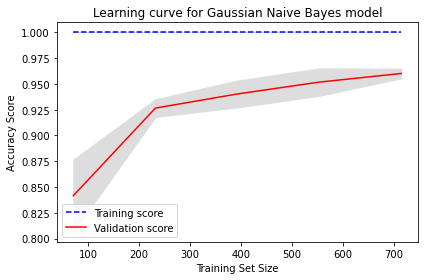

In [18]:

# Plot learning curves
plot_learning_curve(train_sizes, train_scores, val_scores, 'Learning curve for Gaussian Naive Bayes model')